# Vehicle Price Data Wrangling

### Prerequisites to Run the Project
In order to run this project, you need to have a Kaggle API key. Store your kaggle.json in the root of this project's directory.

### Problem Statement
**The average consumer (buying a car valued < 50K) wants to purchase vehicles with reliable engines, and my project aims to find relationships between vehicle make, model year, engine size, and price. I am using a Craigslist Vehicles Dataset, which is 1 month of scraped data from 2021 and some vehicle auction data from 2014-2015. My theory is when comparing the prices in both datasets; the Craigslist price will be closer to the auction price from several years ago than an unreliable vehicle; the logic is that a more reliable engine with more miles is worth more than an unreliable engine with more miles. Since several years have passed since the auctions, the Craigslist data should reflect several years of additional miles for a specific year/make/engine size - even though the vehicles in the Craigslist data are not those up for auction.**

**Research Question: Which vehicle makes, years, and engine sizes lost the most value from 2014 to 2021?**

**Note: This project aims to showcase my data-wrangling abilities. Please take the conclusion with a grain of salt. The data sets I am using might be inaccurate; they are datasets uploaded to Kaggle by random users, and errors in the data are a big possibility.**

### Datasets

#### **Craigslist Vehicles Dataset**

Type: CSV File

Method: The data was gathered programmatically from https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data.

Dataset variables:

* Variable 1: Price (price)
* Variable 2: Year (year)
* Variable 3: Manufacturer (manufacturer)
* Variable 4: Model (model)
* Variable 5: Odometer (odometer)
* Variable 6: Posting Date (posting_date)

I picked this dataset because it gives a reference point for vehicle prices that aids in answering my research question.

In [22]:
# Install and load necessary libraries
!pip install matplotlib
!pip install numpy
!pip install opendatasets
!pip install pandas
!pip install seaborn
import matplotlib.pyplot as plt
import numpy as np
import opendatasets as od
import pandas as pd
import seaborn as sns
import warnings

# suppressing some warnings later in the code, added this last to ensure the errors weren't suppressing anything important
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

# Set random seed for reproducibility
random_seed = 42
np.random.seed(random_seed)

# data gathering method: Programmatically downloading files
dataset_url = 'https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data'
od.download(dataset_url)
vehicles = pd.read_csv('./craigslist-carstrucks-data/vehicles.csv')

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\Garre\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\Garre\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\Garre\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\Garre\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Skipping, found downloaded files in ".\craigslist-carstrucks-data" (use force=True to force download)



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\Garre\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


**Creating a copy of the original data and filtering down to only the necessary variables.**

In [23]:
# creating a separate subset of the data with only the necessary variables, avoids overwriting original df
vehicles_subset = vehicles[['year', 'manufacturer', 'model', 'odometer', 'price', 'posting_date']]

#### **Car Prices Dataset from Kaggle**

Type: CSV File

Method: The data was gathered programmatically from https://www.kaggle.com/datasets/tunguz/used-car-auction-prices

Dataset variables:

* Variable 1: Selling Price (sellingprice)
* Variable 2: Year (year)
* Variable 3: Manufacturer (make)
* Variable 4: Model (model)
* Variable 5: Odometer (odometer)
* Variable 6: Sale Date (saledate)
* Variable 7: Trim (trim)

I picked this dataset since it complements my original dataset by providing a different "point in time" to reference prices of vehicles contained in the first dataset, which is a requirement to answer my research question.

In [24]:
# data gathering method: Programmatically downloading files
dataset_url = 'https://www.kaggle.com/datasets/tunguz/used-car-auction-prices'
od.download(dataset_url)
auction_prices = pd.read_csv('./used-car-auction-prices/car_prices.csv', on_bad_lines='warn')
# creating a separate subset of the data with only the necessary variables, avoids overwriting original df
auction_subset = auction_prices[['year', 'make', 'model', 'odometer', 'sellingprice', 'saledate', 'trim']]

Skipping, found downloaded files in ".\used-car-auction-prices" (use force=True to force download)


C:\Users\Garre\AppData\Local\Temp\ipykernel_31544\1957637966.py:4: ParserWarning: Skipping line 408163: expected 16 fields, saw 17
Skipping line 417837: expected 16 fields, saw 17
Skipping line 421291: expected 16 fields, saw 17
Skipping line 424163: expected 16 fields, saw 17

  auction_prices = pd.read_csv('./used-car-auction-prices/car_prices.csv', on_bad_lines='warn')
C:\Users\Garre\AppData\Local\Temp\ipykernel_31544\1957637966.py:4: ParserWarning: Skipping line 427042: expected 16 fields, saw 17
Skipping line 427045: expected 16 fields, saw 17
Skipping line 434426: expected 16 fields, saw 17
Skipping line 444503: expected 16 fields, saw 17
Skipping line 453796: expected 16 fields, saw 17

  auction_prices = pd.read_csv('./used-car-auction-prices/car_prices.csv', on_bad_lines='warn')
C:\Users\Garre\AppData\Local\Temp\ipykernel_31544\1957637966.py:4: ParserWarning: Skipping line 461599: expected 16 fields, saw 17
Skipping line 461614: expected 16 fields, saw 17

  auction_prices = p

**A warning may be produced here about the expected number of fields. This is fine, as I'll clean it up as part of the exercise in this project.**

## Assessing the Data

### Quality Issues in Craigslist Vehicle Data
**Inaccurate values in the price column, date consistency problem, poor data types, invalid rows, extreme odometer values, missing values**

**Visual Inspection**

In [67]:
vehicles_subset.sample(25)

,year,manufacturer,model,odometer,price,posting_date
209839,2012,volkswagen,cc,138850,3600,2021-04-06T15:40:21-0400
174998,2011,ford,f250,237000,27995,2021-04-14T15:06:08-0500
362825,2012,ram,2500 slt 4x4 cummins,226672,24888,2021-04-08T16:21:47-0500
141889,2015,subaru,outback,94996,15500,2021-04-30T15:45:28-0500
245887,2010,acura,mdx,112603,9995,2021-04-07T19:53:11-0500
218637,2013,ford,f-150 xl,256061,8800,2021-04-16T09:03:03-0500
319143,2007,chevrolet,silverado 2500 hd,110000,16500,2021-05-02T20:07:00-0700
76457,2014,lexus,is 250,101519,20337,2021-05-03T11:56:48-0600
223837,2010,nissan,murano sl,116000,0,2021-04-27T16:24:20-0600
329697,2012,buick,lacrosse,58427,8995,2021-04-15T10:41:11-0400


**There is a data quality issue with pricing; many values are unrealistic. The values of $1,000 or less represent dealers creating ads with down payment amounts instead of the total price, or salvage vehicles. Data types for the year and odometer appear to be wrong.**

**Programmatic Inspection**

In [68]:
# Checking the data to see how many values are $1,000 or less ... will need to remove these
np.count_nonzero(vehicles_subset['price'] <= 1000)

47529

In [69]:
# Checking the data to see how many values are over $50,000 ... will need to remove these
np.count_nonzero(vehicles_subset['price'] > 50000)

12931

In [70]:
vehicles_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   year          426880 non-null  int16 
 1   manufacturer  426880 non-null  object
 2   model         426880 non-null  object
 3   odometer      426880 non-null  int32 
 4   price         426880 non-null  int32 
 5   posting_date  426880 non-null  object
dtypes: int16(1), int32(2), object(3)
memory usage: 13.8+ MB


In [71]:
vehicles_subset.describe()

,year,odometer,price
count,426880.000000,4.268800e+05,4.268800e+05
mean,2005.557862,9.703276e+04,2.489254e+04
std,107.122966,2.130067e+05,5.637797e+06
min,0.000000,0.000000e+00,-1.285419e+09
25%,2008.000000,3.627700e+04,5.900000e+03
50%,2013.000000,8.457000e+04,1.395000e+04
75%,2017.000000,1.330000e+05,2.648000e+04
max,2022.000000,1.000000e+07,1.410065e+09


**I used the np.count_nonzero method on price because there are unrealistic values in the price column; additionally, answering my research question requires determining whether any values are over $50,000 - which wasn't answered with the visual inspection. For the visual portion of the inspection, I used .sample(25) to locate problems in the data quickly, and unrealistic prices and missing values in several columns were found. df.info() uncovers incorrect year, odometer, and price data types. .describe() uncovers extreme price and odometer values. Comparing the dates to the 2nd dataset uncovers a data quality issue with consistency of the date format.**

### Quality Issues in Vehicle Auction Data:
**Missing values in the make, model, odometer, and trim columns. saledate is not in a consistent format. year, odometer, and selling price are not stored using the correct data types.**

**Visual Inspection**

In [72]:
auction_subset.head()

,year,make,model,odometer,sellingprice,saledate,trim
0,2015,Kia,Sorento,16639,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),LX
1,2015,Kia,Sorento,9393,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),LX
2,2014,BMW,3 Series,1331,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),328i SULEV
3,2015,Volvo,S60,14282,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),T5
4,2014,BMW,6 Series Gran Coupe,2641,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),650i


In [73]:
auction_subset.sample(10)

,year,make,model,odometer,sellingprice,saledate,trim
267104,2012,Jeep,Grand Cherokee,35633,22500,Tue Feb 10 2015 01:30:00 GMT-0800 (PST),Laredo
242034,2012,Dodge,Avenger,79653,5000,Thu Feb 12 2015 01:30:00 GMT-0800 (PST),SXT
543313,2014,Mercedes-Benz,E-Class,12594,53750,Tue Jun 16 2015 02:30:00 GMT-0700 (PDT),E550 Sport 4MATIC
5786,2014,Ram,1500,15550,23300,Tue Jan 06 2015 12:30:00 GMT-0800 (PST),SLT
410448,2013,Chrysler,200,30077,11300,Wed May 27 2015 02:30:00 GMT-0700 (PDT),Touring
84573,2001,Chevrolet,Silverado 1500,158490,3300,Tue Jan 06 2015 18:00:00 GMT-0800 (PST),LS
336141,2014,Volvo,S60,3268,22000,Wed Feb 18 2015 06:35:00 GMT-0800 (PST),T5
128885,2006,Ford,Expedition,107555,9600,Thu Jan 15 2015 02:45:00 GMT-0800 (PST),Eddie Bauer
295045,2012,Nissan,Altima,55954,9800,Tue Feb 17 2015 01:30:00 GMT-0800 (PST),2.5 S
428496,2015,Ford,F-250 Super Duty,12500,37000,Tue May 19 2015 04:00:00 GMT-0700 (PDT),XLT


In [74]:
auction_subset.tail()

,year,make,model,odometer,sellingprice,saledate,trim
558806,2015,Kia,K900,18255,33000,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT),Luxury
558807,2012,Ram,2500,54393,30800,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT),Power Wagon
558808,2012,BMW,X5,50561,34000,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT),xDrive35d
558809,2015,Nissan,Altima,16658,11100,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT),2.5 S
558810,2014,Ford,F-150,15008,26700,Thu May 28 2015 05:30:00 GMT-0700 (PDT),XLT


**We can see the odometer column is using an incorrect data type. There is a consistency issue with the model and saledate columns compared to the equivalent column from the Craigslist dataset.**

**Programmatic Inspection**

In [75]:
auction_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   year          558811 non-null  int64 
 1   make          558811 non-null  object
 2   model         558811 non-null  object
 3   odometer      558811 non-null  int32 
 4   sellingprice  558811 non-null  int32 
 5   saledate      558811 non-null  object
 6   trim          558811 non-null  object
dtypes: int32(2), int64(1), object(4)
memory usage: 25.6+ MB


In [76]:
auction_subset.describe(include='all')

,year,make,model,odometer,sellingprice,saledate,trim
count,558811.000000,558811,558811,558811.000000,558811.000000,558811,558811
unique,NaN,97,974,NaN,NaN,3745,1976
top,NaN,Ford,Altima,NaN,NaN,Tue Feb 10 2015 01:30:00 GMT-0800 (PST),Base
freq,NaN,93554,19349,NaN,NaN,5334,55817
mean,2010.038696,NaN,NaN,68311.702858,13611.262461,NaN,NaN
std,3.966812,NaN,NaN,53400.613183,9749.656919,NaN,NaN
min,1982.000000,NaN,NaN,0.000000,1.000000,NaN,NaN
25%,2007.000000,NaN,NaN,28361.500000,6900.000000,NaN,NaN
50%,2012.000000,NaN,NaN,52247.000000,12100.000000,NaN,NaN
75%,2013.000000,NaN,NaN,99104.500000,18200.000000,NaN,NaN


In [77]:
# These values shouldn't exist
print(auction_subset["saledate"][auction_subset["saledate"] < '20000'])

Series([], Name: saledate, dtype: object)


**df.head(), df.sample(10), and df.tail() are sufficient to get a good sample of the data and notice any issues visually. Aside from the inconsistent date format and the incorrect data type in the sellingprice column, the data looks good visually. df.info() uncovered that year and price are the wrong data types, and df.describe() uncovers extreme values in odometer and sellingprice. Print with a filter on saledate uncovers some data that got pushed into the sale date column, probably due to commas in an earlier field, and will need to be filtered out.**

### Craigslist Data Tidiness Issue:
**Model column contains multiple variables, which violates the rule: "each variable forms a column." Some records include the model, along with engine size, trim, number of doors, or drive type (4WD/4x4, AWD, FWD, RWD). There are also some rows with irrelevant data in the model column.**

**Visual Inspection**

In [36]:
vehicles_subset.sample(50)

,year,manufacturer,model,odometer,price,posting_date
207001,2018.0,alfa-romeo,romeo stelvio ti sport,16493.0,27990,2021-04-12T11:01:07-0400
252640,2017.0,ford,expedition xlt sport,70760.0,29590,2021-04-24T10:21:08-0400
223706,2001.0,gmc,sierra 3500hd,204000.0,6000,2021-04-30T19:44:35-0600
120159,2018.0,mercedes-benz,gle 350 sport,16482.0,37590,2021-04-15T08:00:35-0400
214550,2012.0,lincoln,navigator l,155961.0,277,2021-05-03T16:32:03-0500
21963,2018.0,buick,encore preferred ii sport,1625.0,20990,2021-04-26T09:31:01-0700
424142,2018.0,cadillac,xt5 luxury sport,19209.0,32990,2021-04-22T07:17:59-0500
24405,2017.0,alfa-romeo,romeo giulia ti sedan 4d,41228.0,27990,2021-04-22T10:50:59-0700
148774,2011.0,ford,fusion,141021.0,6000,2021-04-25T12:56:14-0500
421799,2009.0,honda,accord lx,113371.0,7500,2021-04-07T15:40:39-0500


**The model column in the Craigslist vehicle data contains multiple variables in some cases. For example: "A4 2.0T Quattro Premium" includes engine size and trim, not just the model "A4". Other variables seen in the data include the number of doors and drive type (RWD, AWD, FWD).**

In [37]:
vehicles_subset["model"].value_counts()

model
f-150                   8009
silverado 1500          5140
1500                    4211
camry                   3135
silverado               3023
                        ... 
Saab 9-3 Turbo 4           1
power wagon 2500 slt       1
scottdale big 10           1
1500, slt                  1
1500 longhorn 4x4          1
Name: count, Length: 29667, dtype: int64

**vehicles_subset.sample(50) provides enough data to visually see multiple variables in the model column. We can see using .value_counts there is invalid data in the model column, along with some of the extra variables mentioned earlier.**

### Vehicle Auction Data Tidiness Issue:
**The trim column contains multiple variables, which violates the rule: "each variable forms a column." The engine size variable is included in addition to trim.**

**Visual Inspection**

In [38]:
auction_subset["trim"].sample(50)

461579                      Base
115306                       HSE
383477                        SE
309006                        LS
346025                        SV
543524                        LE
288124                      Base
461014                       XLT
128459                        EX
131187                       SR5
303656                        LT
138546                        LT
123904    American Value Package
261821                        LX
49362                       528i
307025                   Limited
264853                        SE
380555                 i Touring
229277                         S
131667                        SE
159536                    3.5 SV
423226                       SEL
265811                      G37x
359479                       1.6
515894                       1LT
300774                    Hybrid
415820                   Limited
95207                        NaN
405317                      S550
408301                        GT
502805    

**The trim column in the car auction data contains engine sizes and trim levels for a significant number of vehicles where the engine size should not be included as part of the trim variable. This violates the tidiness rule of having one variable per column.**

**Programmatic Inspection**

In [39]:
auction_subset[(auction_subset["trim"] == "2.0 SL") & (auction_subset["make"] == "Nissan")].shape[0]

219

**.sample(50) gives us a sufficient amount of data to see the same problem with engine sizes being included in multiple vehicle trims, when it should not be. The .shape[0] on filtered data gives us a count of how many times this is happening on one of the more well known trims that shouldn't include engine size. The proper trim is just "SL".**

## Cleaning Data

### Quality Issues in Craigslist Vehicle Data
**Inaccurate values in the price column, date consistency problem, poor data types, invalid rows, extreme odometer values, missing values**

In [40]:
# First, I'll fill the missing data with zeroes to make invalid rows easy to find.
vehicles_subset.fillna(0, inplace=True)
# Next, I'll update the data types to more appropriate types.
vehicles_subset["year"] = vehicles_subset["year"].astype(np.int16) # should not be float
vehicles_subset["odometer"] = vehicles_subset["odometer"].astype(np.int32) # should not be float
vehicles_subset["price"] = vehicles_subset["price"].astype(np.int32) # int64 is not necessary

# Filtering out invalid rows that had missing values. year, model, and manufacturer and the price range filters 
# are required in order to answer the research question.
filtered_vs = vehicles_subset[(vehicles_subset['year'] != 0) & (vehicles_subset["model"] != '0') & (vehicles_subset["manufacturer"] != 0) &
                                (vehicles_subset['price'] > 1000) & (vehicles_subset['price'] <= 50000) & (vehicles_subset['odometer'] < 1000000)]

filtered_vs['posting_date'] = pd.to_datetime(filtered_vs['posting_date'], utc=True).dt.strftime('%Y-%m-%d')

# To fix consistency of this column, make sure there is no whitespace and the first letter is capitalized and remaining letters
# are in lowercase.
filtered_vs['manufacturer'] = filtered_vs['manufacturer'].str.strip().str.title()

# verifying that missing values have been filled, we have the updated data types, and that filters appear to be working.
filtered_vs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 352321 entries, 27 to 426879
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   year          352321 non-null  int16 
 1   manufacturer  352321 non-null  object
 2   model         352321 non-null  object
 3   odometer      352321 non-null  int32 
 4   price         352321 non-null  int32 
 5   posting_date  352321 non-null  object
dtypes: int16(1), int32(2), object(3)
memory usage: 14.1+ MB


**df.info() verifies that cleaning the data types, filtering out invalid rows, and filling in missing values appears successful; the number of rows is significantly reduced.**

In [41]:
# verifying visually and looking to see whether the filters worked
filtered_vs.sample(50)

,year,manufacturer,model,odometer,price,posting_date
149392,2017,Alfa-Romeo,romeo giulia ti sedan 4d,18859,28990,2021-04-22
272,2005,Acura,tl,179721,5980,2021-05-02
379045,2019,Nissan,frontier,34940,26995,2021-04-15
314714,2000,Mercedes-Benz,slk,114100,7000,2021-04-12
165546,2008,Honda,fit sport,177000,4995,2021-04-28
408776,1996,Chevrolet,corvette,96303,12990,2021-05-04
61901,2010,Toyota,corolla le,85304,8899,2021-05-03
202175,2011,Buick,lucerne,124365,4995,2021-04-17
48227,2015,Volkswagen,jetta,71862,13515,2021-04-07
291973,2012,Ram,1500,164786,24995,2021-04-10


**The filters appear to have removed low and extreme values in the odometer and price columns, plus invalid year/model/mfr rows. The dates are in my chosen format to match the 2nd dataset.**

**The main issue with the data was dropping the invalid rows. Many rows did not have one or more of the following variables: year/make/model/price, which causes the row to be invalid. By using .fillna(0), these rows are marked with a zero value and are easily filtered out; plus, I was able to easily add in my odometer and price filters. Fixing the date format allows for a comparison of like terms as the date in the 2nd dataset (once I update it's format too). I had to come back and fix the consistency of the manufacturer column to ensure consistency for the join at the end of the project.**

### Quality Issues in Vehicle Auction Data:
**Missing values in the make, model, odometer, and trim columns. saledate is not in a consistent format. year, odometer, and selling price are not stored using the correct data types.**

In [42]:
# filling missing values with zero to make them easy to filter out
auction_subset.fillna(0, inplace=True)

# Next, I'll update the data types to more appropriate types.
auction_subset["year"].astype(np.int16) # should not be float
auction_subset["odometer"] = auction_subset["odometer"].astype(np.int32) # should not be float
auction_subset["sellingprice"] = auction_subset["sellingprice"].astype(np.int32) # int64 is not necessary

# Filtering out invalid rows that had missing values. year, model, and manufacturer and the price range filters 
# are required in order to answer the research question.
filtered_as = auction_subset[(auction_subset['year'] != 0) & (auction_subset["model"] != '0') & (auction_subset["make"] != 0) &
                            (auction_subset['sellingprice'] > 1000) & (auction_subset['sellingprice'] <= 50000) & (auction_subset['odometer'] < 1000000) &
                            (auction_subset['saledate'] >= '2014-01-01')]

# Pandas can't handle this messy timestamp natively, so I had to use some regex to clean it up. The regex looks for patterns of GMT,
# followed by any character, and uses the * which selects 0 or more of the previous character (which, since it's any character -
# means every remaining character) ... then it replaces that with an empty string which deletes it. Then I convert that to a date
# to match the format from the first dataset.
datetimes = pd.to_datetime(auction_subset['saledate'].str.replace(r'GMT.*', '', regex=True).str.strip(), errors='coerce').dt.date
filtered_as["saledate"] = datetimes

# To fix consistency of this column, make sure there is no whitespace and the first letter is capitalized and remaining letters
# are in lowercase.
filtered_as['make'] = filtered_as['make'].str.strip().str.title()

# verifying that missing values have been filled, we have the updated data types, and that filters appear to be working.
filtered_as.describe(include='all')

,year,make,model,odometer,sellingprice,saledate,trim
count,528438.000000,528438,528438,528438.000000,528438.000000,528438,528438
unique,NaN,58,894,NaN,NaN,171,1828
top,NaN,Ford,Altima,NaN,NaN,2014-12-18,Base
freq,NaN,91162,19037,NaN,NaN,15645,52347
mean,2010.383224,NaN,NaN,64854.913210,13778.731442,NaN,NaN
std,3.565149,NaN,NaN,49486.270993,8573.160268,NaN,NaN
min,1984.000000,NaN,NaN,0.000000,1005.000000,NaN,NaN
25%,2008.000000,NaN,NaN,27894.000000,7600.000000,NaN,NaN
50%,2012.000000,NaN,NaN,49901.000000,12500.000000,NaN,NaN
75%,2013.000000,NaN,NaN,93975.000000,18400.000000,NaN,NaN


In [43]:
filtered_as.sample(10) # visual review

,year,make,model,odometer,sellingprice,saledate,trim
486072,2014,Subaru,Legacy,21272,18800,2015-06-02,2.5i Premium PZEV
223604,2012,Nissan,Altima,41761,13250,2015-02-03,2.5 S
506953,2013,Dodge,Avenger,56662,9900,2015-06-05,SXT
359102,2012,Volkswagen,Passat,49370,11000,2015-02-27,SE PZEV
128099,2007,Chevrolet,Silverado 1500 Classic,69595,12600,2015-01-13,LS
496321,2003,Chevrolet,S-10,167385,4000,2015-06-03,LS
86151,2012,Ford,Escape,21137,19600,2015-01-07,Limited
296609,2008,Chevrolet,Silverado 1500,206718,6800,2015-02-11,Work Truck
444984,2005,Honda,Odyssey,150286,4400,2015-06-03,EX-L
474105,2011,Mercedes-Benz,C-Class,62590,15800,2015-05-28,C300 Luxury 4MATIC


In [44]:
filtered_as.info() # programmatic review
print(filtered_as[filtered_as['saledate'].isna()]['saledate'])

<class 'pandas.core.frame.DataFrame'>
Index: 528438 entries, 0 to 558810
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   year          528438 non-null  int64 
 1   make          528438 non-null  object
 2   model         528438 non-null  object
 3   odometer      528438 non-null  int32 
 4   sellingprice  528438 non-null  int32 
 5   saledate      528438 non-null  object
 6   trim          528438 non-null  object
dtypes: int32(2), int64(1), object(4)
memory usage: 28.2+ MB
Series([], Name: saledate, dtype: object)


**I can tell by looking at df.info() that the missing values have been replaced, then filtered out, but there are 5 missing values in saledate. df.describe() shows the filters for price, odometer, and saledate have worked. There were some bad saledates due to commas in one of the columns pushing data to the right - but that was fixed by the saledate filter. df.sample() shows our date formatting worked, and other data is looking good. print(filtered_as[filtered_as['saledate'].isna()]['saledate']) reveals some NaT (not a time) values, and after filtering those out, the data quality will be good.**

In [45]:
filtered_as = filtered_as.dropna(subset=['saledate']) # This removes any rows with NaN or NaT values
filtered_as.info() # checking to make sure there are no more missing values
filtered_as.head() # double checking the visual appearance of the data

<class 'pandas.core.frame.DataFrame'>
Index: 528438 entries, 0 to 558810
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   year          528438 non-null  int64 
 1   make          528438 non-null  object
 2   model         528438 non-null  object
 3   odometer      528438 non-null  int32 
 4   sellingprice  528438 non-null  int32 
 5   saledate      528438 non-null  object
 6   trim          528438 non-null  object
dtypes: int32(2), int64(1), object(4)
memory usage: 28.2+ MB


,year,make,model,odometer,sellingprice,saledate,trim
0,2015,Kia,Sorento,16639,21500,2014-12-16,LX
1,2015,Kia,Sorento,9393,21500,2014-12-16,LX
2,2014,Bmw,3 Series,1331,30000,2015-01-15,328i SULEV
3,2015,Volvo,S60,14282,27750,2015-01-29,T5
5,2015,Nissan,Altima,5554,10900,2014-12-30,2.5 S


**After using .dropna(), the quality of the auction data looks good.**

### Craigslist Data Tidiness Issue:
**Model column contains multiple variables, which violates the rule: "each variable forms a column." Some records include the model, along with engine size, trim, number of doors, or drive type (4WD/4x4, AWD, FWD, RWD). There are also some rows with irrelevant data in the model column.**

In [46]:
# filtering down to only records with an engine size in the model column using regex. the regex looks for a 
# single 0-9 character, followed by a period character, followed by a single 0-9 character ... this is the
# number of liters of the engine
filtered_vs = filtered_vs[filtered_vs['model'].str.contains(r'[0-9]{1}[.][0-9]{1}', regex=True, na=False)]
# creating a new column for engine_size by extracting the data, setting data type to float32
filtered_vs['engine_size'] = filtered_vs['model'].str.extract(r'([0-9]{1}[.][0-9]{1})').astype(np.float32)

filtered_vs.info() # checking the data programatically
filtered_vs.head() # checking the data visually

<class 'pandas.core.frame.DataFrame'>
Index: 9164 entries, 92 to 426753
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          9164 non-null   int16  
 1   manufacturer  9164 non-null   object 
 2   model         9164 non-null   object 
 3   odometer      9164 non-null   int32  
 4   price         9164 non-null   int32  
 5   posting_date  9164 non-null   object 
 6   engine_size   9164 non-null   float32
dtypes: float32(1), int16(1), int32(2), object(3)
memory usage: 411.7+ KB


,year,manufacturer,model,odometer,price,posting_date,engine_size
92,2015,Infiniti,qx60 3.5 sport utility,96003,19990,2021-04-20,3.5
99,2018,Audi,a6 2.0t premium sedan 4d,13035,29590,2021-04-19,2.0
134,2018,Audi,a6 2.0t premium plus sedan,24996,29990,2021-04-11,2.0
167,2018,Infiniti,qx60 3.5 sport utility,41119,27590,2021-04-04,3.5
301,2017,Subaru,legacy 2.5i premium sedan,10309,19990,2021-05-02,2.5


**Filtering out data that doesn't contain an engine size removes data that can't be used to answer my research question. I then extracted the engine size from the model column and created a new "engine_size" column. df.info() verifies we don't have any missing values or incorrect data types.**

### Vehicle Auction Data Tidiness Issue:
**The trim column contains multiple variables, which violates the rule: "each variable forms a column." The engine size variable is included in addition to trim.**

In [47]:
# filtering down to only records with an engine size in the model column using regex. the regex looks for a 
# single 0-9 character, followed by a period character, followed by a single 0-9 character ... this is the
# number of liters of the engine
filtered_as = filtered_as[filtered_as['trim'].str.contains(r'[0-9]{1}[.][0-9]{1}', regex=True, na=False)]
# creating a new column for engine_size by extracting the data, setting data type to float32
filtered_as['engine_size'] = filtered_as['trim'].str.extract(r'([0-9]{1}[.][0-9]{1})').astype(np.float32)

filtered_as.info() # checking the data programatically
filtered_as.head() # checking the data visually

<class 'pandas.core.frame.DataFrame'>
Index: 49158 entries, 5 to 558809
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          49158 non-null  int64  
 1   make          49158 non-null  object 
 2   model         49158 non-null  object 
 3   odometer      49158 non-null  int32  
 4   sellingprice  49158 non-null  int32  
 5   saledate      49158 non-null  object 
 6   trim          49158 non-null  object 
 7   engine_size   49158 non-null  float32
dtypes: float32(1), int32(2), int64(1), object(4)
memory usage: 2.8+ MB


,year,make,model,odometer,sellingprice,saledate,trim,engine_size
5,2015,Nissan,Altima,5554,10900,2014-12-30,2.5 S,2.5
8,2014,Audi,A4,9557,32250,2014-12-18,2.0T Premium Plus quattro,2.0
10,2014,Audi,A6,14414,49750,2014-12-16,3.0T Prestige quattro,3.0
15,2015,Nissan,Altima,11398,14100,2014-12-23,2.5 S,2.5
17,2014,Audi,Q5,7983,40000,2014-12-18,2.0T Premium Plus quattro,2.0


**I extracted the engine size variable from the trim column into a new engine_size column. The data is looking good when checking with df.info() and df.head().**

### **Removing Unneeded Variables and Joining the Datasets**

In [48]:
# dropping the model column
filtered_vs = filtered_vs.drop('model', axis=1)

**The model column has poor data consistency, with too many human-entered irrelevant values to tidy it up. I dropped the model column since we extracted the usable data into the engine_size column.**

In [49]:
# filtering down the data to only include mean prices and odometer readings
filtered_vs_means = filtered_vs.groupby(['year', 'manufacturer', 'engine_size'])[['price', 'odometer']].mean().reset_index()
filtered_vs_means.info()
filtered_vs_means.sample(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 831 entries, 0 to 830
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          831 non-null    int16  
 1   manufacturer  831 non-null    object 
 2   engine_size   831 non-null    float32
 3   price         831 non-null    float64
 4   odometer      831 non-null    float64
dtypes: float32(1), float64(2), int16(1), object(1)
memory usage: 24.5+ KB


,year,manufacturer,engine_size,price,odometer
548,2014,Hyundai,2.0,12286.142857,79132.714286
239,2006,Toyota,2.4,5000.000000,127800.000000
731,2018,Chevrolet,1.4,15964.333333,40867.333333
536,2014,Chevrolet,3.5,31000.000000,80797.000000
230,2006,Mercedes-Benz,5.5,18999.000000,59000.000000
292,2007,Toyota,5.7,20982.000000,165444.000000
20,1992,Toyota,3.0,8995.000000,196490.000000
662,2016,Nissan,2.5,13707.339286,64214.571429
444,2012,Bmw,3.0,20800.000000,66533.000000
141,2004,Audi,2.7,10000.000000,101000.000000


**df.info() and df.sample(20) show the changes are looking as I expected - grouping year/mfr/engine_size and using the mean values of price/odometer for those groups.**

In [50]:
# dropping the model and trim columns
filtered_as.drop(['model','trim'], axis=1, inplace=True)

**Neither the model or trim column was necessary to answer the research question, and trim was untidy due to having multiple variables.**

In [51]:
# filtering down the data to only include mean prices and odometer readings
filtered_as_means = filtered_as.groupby(['year', 'make', 'engine_size'])[['sellingprice', 'odometer']].mean().reset_index()
filtered_as_means.info() # reviewing changes programmatically
filtered_as_means.sample(20) # reviewing changes visually

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          351 non-null    int64  
 1   make          351 non-null    object 
 2   engine_size   351 non-null    float32
 3   sellingprice  351 non-null    float64
 4   odometer      351 non-null    float64
dtypes: float32(1), float64(2), int64(1), object(1)
memory usage: 12.5+ KB


,year,make,engine_size,sellingprice,odometer
272,2011,Hyundai,2.0,11301.388889,57073.888889
295,2012,Nissan,2.0,9743.813278,41020.709544
19,1999,Acura,2.3,1400.000000,118362.500000
178,2006,Volkswagen,1.8,3750.000000,101081.000000
89,2002,Vw,1.8,2150.000000,123304.000000
269,2011,Audi,3.0,28151.754386,50714.105263
147,2005,Nissan,1.8,2410.326087,127382.326087
294,2012,Nissan,1.8,7730.127500,46312.210000
218,2008,Nissan,2.5,6901.785714,98181.437500
275,2011,Nissan,1.6,5709.375000,69449.375000


In [52]:
joined_df = pd.merge(
    filtered_as_means, filtered_vs_means,
    left_on=['year', 'make', 'engine_size'],
    right_on=['year', 'manufacturer', 'engine_size'],
    how='inner'
)

**Merged the datasets together by joining on year, make/manufacturer, and engine_size**.

In [53]:
joined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          235 non-null    int64  
 1   make          235 non-null    object 
 2   engine_size   235 non-null    float32
 3   sellingprice  235 non-null    float64
 4   odometer_x    235 non-null    float64
 5   manufacturer  235 non-null    object 
 6   price         235 non-null    float64
 7   odometer_y    235 non-null    float64
dtypes: float32(1), float64(4), int64(1), object(2)
memory usage: 13.9+ KB


**Checking what data we have after the join. Certainly a large reduction - but still 231 combinations of years/makes/engine sizes.**

In [54]:
joined_df = joined_df.drop('manufacturer', axis=1) # redundant data

**Dropping a redundant column - make has the same data.**

In [55]:
joined_df.columns = ['year', 'make', 'engine_size', 'auction_price_mean', 'auction_odometer_mean', 'craigslist_price_mean', 'craigslist_odometer_mean']

**Renaming columns to better represent their meanings.**

In [56]:
joined_df["odometer_change"] = joined_df["craigslist_odometer_mean"] - joined_df["auction_odometer_mean"]
joined_df["price_change"] = joined_df["craigslist_price_mean"] - joined_df["auction_price_mean"]

**Adding calculated columns to assist with analyzing results and answer the research question.**

In [57]:
joined_df = joined_df[['year', 'make', 'engine_size','auction_odometer_mean', 'craigslist_odometer_mean', 'odometer_change',
                       'auction_price_mean', 'craigslist_price_mean', 'price_change']] 

**Reordering columns for easier readability.**

In [58]:
joined_df = joined_df.query('odometer_change >= 0')

**Filtered out instances where the Craigslist odometer readings were less than the auction odometer readings. We only want to compare records where the average mileage has increased since the auctions.**

In [59]:
joined_df.head()

,year,make,engine_size,auction_odometer_mean,craigslist_odometer_mean,odometer_change,auction_price_mean,craigslist_price_mean,price_change
0,1997,Acura,3.0,124687.500000,167500.0,42812.500000,1550.000000,3625.0,2075.000000
1,1997,Bmw,1.9,120821.166667,152717.0,31895.833333,3425.000000,7899.0,4474.000000
2,1998,Acura,3.0,92018.666667,170000.0,77981.333333,2600.000000,2500.0,-100.000000
5,1999,Acura,3.2,161763.428571,295115.0,133351.571429,1789.285714,2450.0,660.714286
8,2000,Acura,3.2,159498.568182,219500.0,60001.431818,1830.681818,2650.0,819.318182


**Reviewing the updated order and column names. Appearance and readability is much better.**

In [60]:
year_groups = list(range(1997, 2016, 3)) # bucket the years into groups between 1997-2016 in 3 year increments
 # list comprehension that creates a list of 3yr group labels from year_groups
group_labels = [f"{start}-{start+2}" for start in year_groups[:-1]]
# create the years_grouped column in the dataset, by lookning at year then comparing the years with the bins to 
# find the correct bin and group labels ... right = True displays the later year e.g. the 2002 in 2000-2002 and
# include_lowest includes the beginning of the range e.g. 2000 in 2000-2002
joined_df['years_grouped'] = pd.cut(joined_df['year'], bins=year_groups, labels=group_labels, right=True, include_lowest=True)

**I have run into difficulty displaying the data visually because there are so many years and engine types. I decided to group the years in 3-year increments. This makes creating usable heatmaps more viable.**

## Storing the Data

In [61]:
# saving the merged data to pickle file to save data types
joined_df.to_pickle('merged_vehicle_price_data.pkl') # cleaned data

# backup the raw source data to pickle files
vehicles.to_pickle('craigslist_vehicle_data_bk.pkl')
auction_prices.to_pickle('vehicle_auction_data_bk.pkl')


## Answering the Research Question

**Research Question: Which vehicle makes, years, and engine sizes lost the most value from 2014 to 2021?**

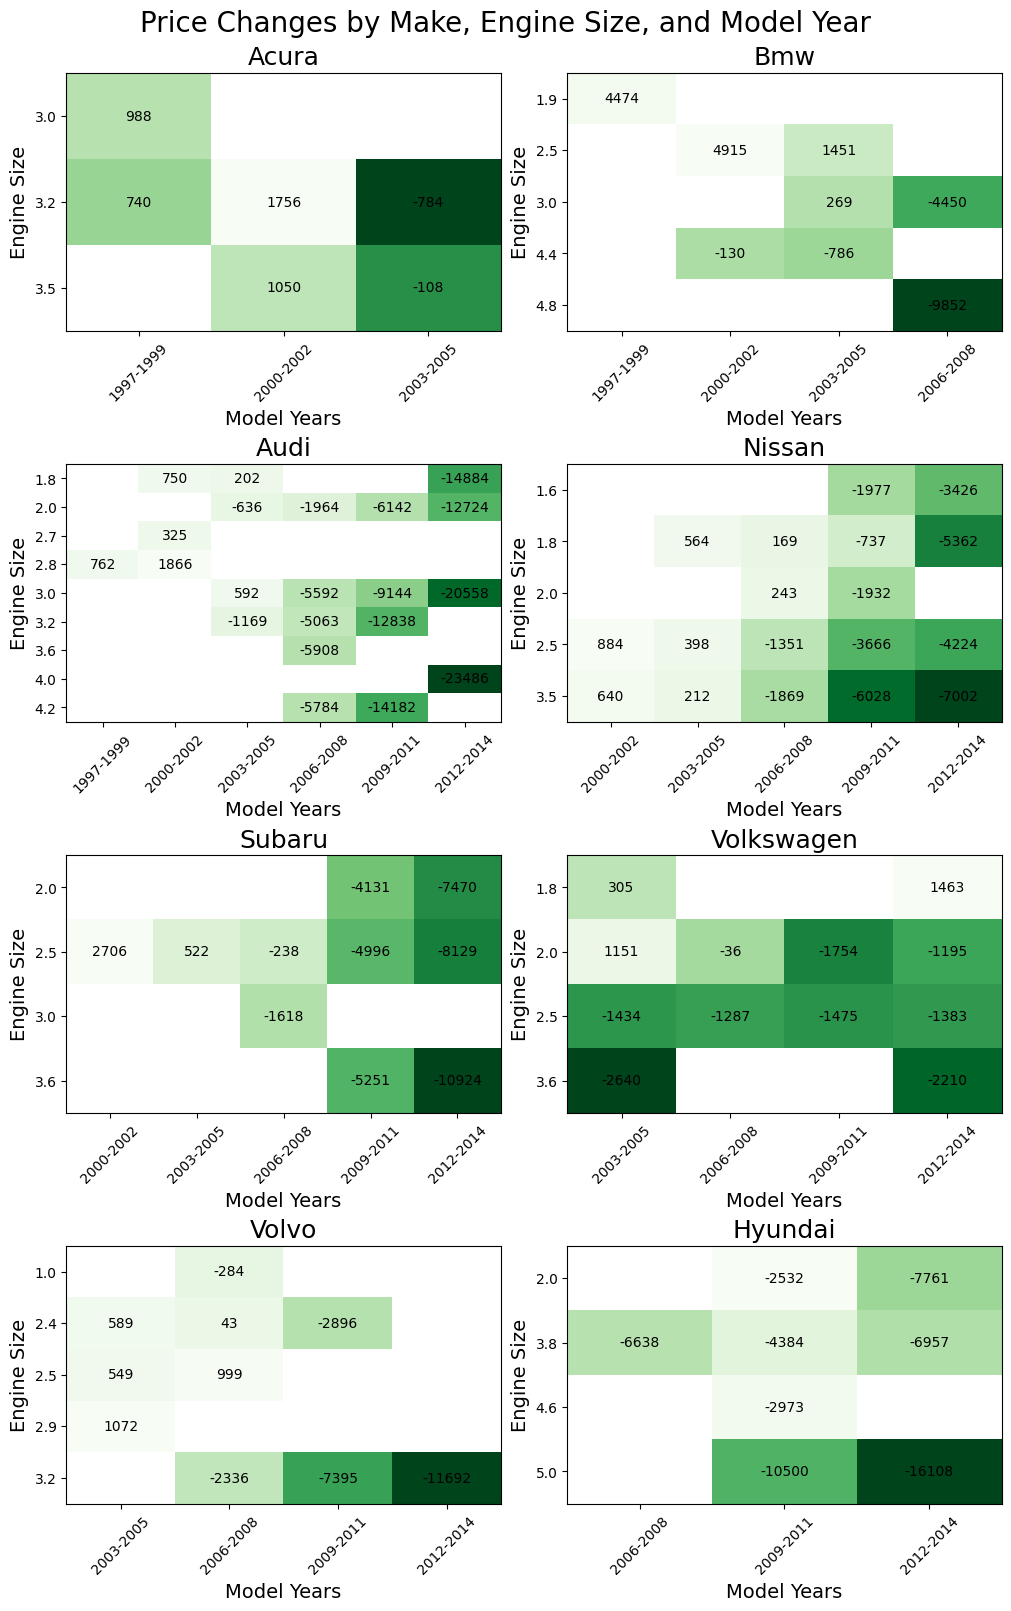

In [62]:
# extract the unique makes from the make column in joined df
makes = joined_df['make'].unique()
# the number of columns we want to display ... e.g. 2 means 2 charts per row
n_cols = 2
# the number of rows is simply calculated using ceiling of len(makes) / n_cols
n_rows = int(np.ceil(len(makes) / n_cols))

# creating subplots ... fig size measures in inches ... 
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4), constrained_layout=True)
axes = axes.flatten()

# loop through each vehicle make to display a heatmap for that make
for i, make in enumerate(makes):
    # picks the axes[i] we are currently iterating on ... e.g. 0 would be the upper left chart that was generated when we
    # created the subplots above. This ensures the data 
    ax = axes[i]
    # this gets a subset of our dataframe for each make as we loop through
    subset = joined_df[joined_df['make'] == make]

    # creates a pivot table with our variables and using the subset for each make as our dataset
    pivot = pd.pivot_table(subset, values='price_change', index='engine_size', columns='years_grouped',
                           aggfunc='mean', observed=False).sort_index()

    # this shows the heatmaps and sets an automatic aspect ratio ... without aspect the charts will come out in different widths/heights
    # cmap=Greens since we are representing money ... reversed due to preference
    img = ax.imshow(pivot.values, aspect='auto', cmap='Greens_r')
    # set chart title to show the vehicle make
    ax.set_title(make, fontsize=18)
    # set x axis ticks to year buckets ... pivot.shape(1) tells us how many year buckets there are for each make
    # by looking at the pivot table we created earlier, and selecting the columns using .shape[1]
    ax.set_xticks(np.arange(pivot.shape[1]))
    # updating font sizes for x/y labels
    ax.set_xlabel("Model Years", fontsize=14)
    ax.set_ylabel("Engine Size", fontsize=14)
    # changing the rotation of the ticklabels to 45 deg because they'll get bunched together without rotating
    ax.set_xticklabels(pivot.columns, rotation=45)
    # setting the number of yticks based on the pivot row shape
    ax.set_yticks(np.arange(pivot.shape[0]))
    # setting .1f formatting so engine size in litres is displayed correctly
    ax.set_yticklabels([f"{v:.1f}" for v in pivot.index])  

    # loop through each cell in the heatmap and assign the proper values
    # using .0f format since we don't care about a few cents
    # .shape[0] gets the row_count and .shape[1] in the inner loop gets the col count
    for y in range(pivot.shape[0]):
        for x in range(pivot.shape[1]):
            # pulls the val out of pivot table based on the current x,y location we are iterating on
            val = pivot.iloc[y, x]
            # ensure the value is not nan
            if pd.notna(val):
                # assigning the value to the proper location on the heatmap and setting some formatting
                ax.text(x, y, f"{val:.0f}", ha='center', va='center', fontsize=10, color='black')

# sets a "super" title above all the heatmaps
fig.suptitle("Price Changes by Make, Engine Size, and Model Year", fontsize=20)
# show the heatmaps
plt.show()

**These are heat-map visualizations showing price changes for each make, year, and engine size. Making a single heat-map wasn't feasible due to the large number of combinations of makes, years, and engine sizes.**

## Research Question Answer (Heatmap)

**We can tell by looking at the *values* on the heatmaps that Audi vehicles lost the most value, the larger engine sizes lose more value than smaller engine sizes, and that older model years show less depreciation as time goes on.**

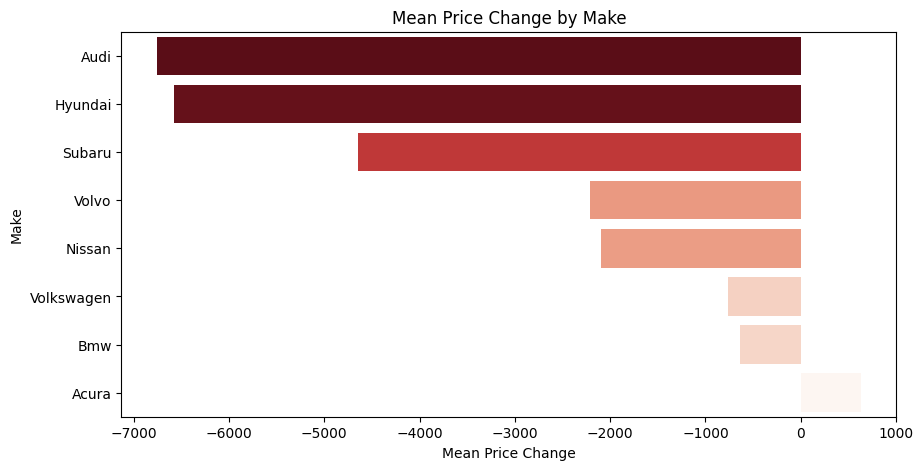

In [63]:
# group the data by make, and the mean price change sorting in ascending order (largest loss in value first), reset_index 
# converts make into a column
mean_price_change = joined_df.groupby('make')['price_change'].mean().sort_values(ascending=True).reset_index()

# set figsize to 10 in wide x 5 in height
plt.figure(figsize=(10, 5))
# trying a seaborn bar plot ... selecting Reds reversed pallete to highlight losses better
sns.barplot(data=mean_price_change, x='price_change', y='make', hue='price_change', legend=False, palette='Reds_r')
# setting up titles and x/y labels
plt.title("Mean Price Change by Make")
plt.xlabel("Mean Price Change")
plt.ylabel("Make")
# show the bar plot
plt.show()

## Research Question Answer (Barplot)

**The bar plot confirms our findings from the heatmap for makes. Audi vehicles lost the most value, losing on average about $6,700 over the 6-7 year time period. The darker bars are big losses and light bars are small losses.**

### Reflecting on the Project

If I had more time to spend on this project, I'd review the data cleaning and quality steps to determine why the merged data is missing so many makes. I attempted to resolve this in the data quality phase by stripping spaces and using the .title() format to make the variable. This worked to an extent, but for some unknown reason, many makes are missing despite the presence in both datasets. Another angle I'd explore is to check the sample sizes, as some outputs are probably shown in the heatmaps while being based on super-low samples. The vehicle model could be added as a variable, which could be very helpful. However, it would likely require using ML or AI to get accurate classifications of the model field from the Craigslist data.